### Data Source
http://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-03-14

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import .csv data
data = pd.read_csv('drugs.csv')
data.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


In [4]:
print(data.shape)

(1988, 28)


In [5]:
# Data overview
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   category                                     1988 non-null   object 
 1   medicine_name                                1988 non-null   object 
 2   therapeutic_area                             1703 non-null   object 
 3   common_name                                  1984 non-null   object 
 4   active_substance                             1987 non-null   object 
 5   product_number                               1988 non-null   int64  
 6   patient_safety                               1988 non-null   bool   
 7   authorisation_status                         1987 non-null   object 
 8   atc_code                                     1960 non-null   object 
 9   additional_monitoring                        1988 non-null   bool   
 10  

In [6]:
# Data overview
print(data.describe())

       product_number  revision_number
count     1988.000000      1892.000000
mean      2634.774145        13.527484
std       1915.734686        11.647056
min         24.000000         0.000000
25%        715.750000         4.750000
50%       2544.500000        11.000000
75%       4351.000000        19.000000
max       6039.000000        89.000000


In [7]:
print(data.nunique())

category                                          2
medicine_name                                  1976
therapeutic_area                                669
common_name                                    1261
active_substance                               1345
product_number                                 1932
patient_safety                                    2
authorisation_status                              3
atc_code                                       1074
additional_monitoring                             2
generic                                           2
biosimilar                                        2
conditional_approval                              2
exceptional_circumstances                         2
accelerated_assessment                            2
orphan_medicine                                   2
marketing_authorisation_date                   1127
date_of_refusal_of_marketing_authorisation       67
marketing_authorisation_holder_company_name     615
pharmacother

# Motivation


###In our Phase 1 Exploratory Data Analysis (EDA), we observed significant variance in EMA drug approval times, with decision windows ranging from under 30 days to over 1,000 days. While we hypothesized that these differences were driven by the therapeutic domain (e.g., Cancer vs. Diabetes), our initial attempt to cluster drugs using the structured therapeutic_area column proved challenging due to inconsistent labeling, sparse data, and overlapping categories. Standard regulatory labels often obscure the nuance of a drug’s medical context. For example, a "fast-track" designation might imply speed, but does it actually result in a faster approval process, or is it reserved for complex cases that inherently require longer safety scrutiny? Relying solely on pre-defined tags limits our ability to answer this question.

### To overcome the limitations of structured data, this phase employs Unsupervised Natural Language Processing (NLP). By applying Non-Negative Matrix Factorization (NMF) to the unstructured condition_indication text, we aim to:

### Extract Latent Topics: Let the data define the drug categories (e.g., distinguishing "Pediatric HIV" from generic "Infectious Diseases") rather than relying on manual tags.

### Investigate Regulatory Bias: Determine if specific therapeutic topics are disproportionately funneled into "Orphan Medicine" or "Conditional Approval" pathways.

### Analyze Efficiency: Evaluate whether these special pathways genuinely reduce administrative review times, or if the inherent complexity of the drug (as captured by the topic) is the dominant driver of the timeline.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


# 2. Fix Timezones
date_cols = ['marketing_authorisation_date', 'date_of_opinion', 'decision_date', 'first_published']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], utc=True).dt.tz_localize(None)

# 3. Calculate Administrative Time
data['admin_time_days'] = (data['marketing_authorisation_date'] - data['date_of_opinion']).dt.days

# 4. Text Preparation
data['condition_indication'] = data['condition_indication'].fillna('').astype(str)
# Keep rows with valid text and valid time calculation
data_clean = data[data['condition_indication'] != ''].dropna(subset=['admin_time_days']).copy()

print(f"Data ready. Shape: {data_clean.shape}")



Data ready. Shape: (1151, 29)


### While I considered advanced methods like Structural Topic Modeling (STM) or BioBERT, I chose NMF (Non-Negative Matrix Factorization) for this phase. NMF is highly effective for short text descriptions (like drug indications) and provides clear, interpretable latent topics without the computational complexity of deep learning models, making it ideal for our initial unsupervised exploration.

TF-IDF Matrix Shape: (1151, 1000)
Calculating reconstruction errors for Elbow Method...


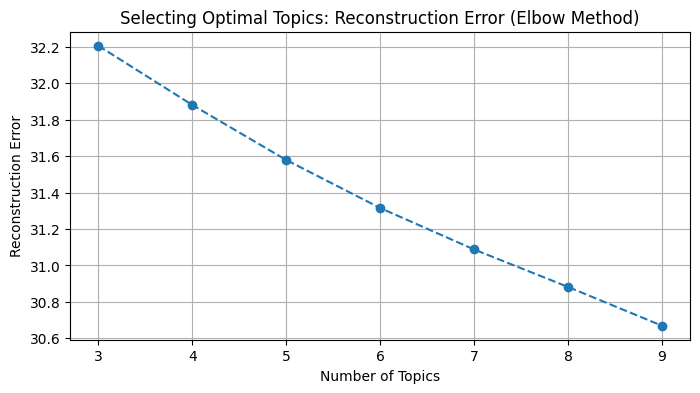

Elbow plot generated. Based on the plot (and interpretability), we selected 6 topics.


In [17]:
# Convert the raw text into a numerical matrix.
# We limit to the top 1000 most frequent words and remove common English stopwords.
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# 'fit_transform' learns the vocabulary and converts the text data to a matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data_clean['condition_indication'])

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


# We iterate through a range of potential topic numbers (k=3 to 9)
# to find the "sweet spot" where reconstruction error drops significantly.
print("Calculating reconstruction errors for Elbow Method...")
errors = []
topic_range = range(3, 10)  # Test for 3 to 9 topics

for k in topic_range:
    # Initialize NMF model with k topics
    nmf_demo = NMF(n_components=k, random_state=42, init='nndsvd')
    nmf_demo.fit(tfidf_matrix)
    # Store the reconstruction error (how much information is lost)
    errors.append(nmf_demo.reconstruction_err_)

# Plot the Reconstruction Error (Elbow Plot)
plt.figure(figsize=(8, 4))
plt.plot(topic_range, errors, marker='o', linestyle='--')
plt.title('Selecting Optimal Topics: Reconstruction Error (Elbow Method)')
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

print("Elbow plot generated. Based on the plot (and interpretability), we selected 6 topics.")

### I determined the optimal number of topics ($k=6$) using a dual approach: Quantitative Validation (The Elbow Method): As shown in the figure above, the reconstruction error decreases rapidly as $k$ increases from 3 to 6. Beyond $k=6$, the curve begins to flatten, indicating diminishing returns in model performance.

In [16]:
# 1. NMF Topic Modeling
n_topics = 6
nmf_model = NMF(n_components=n_topics, random_state=42, init='nndsvd')
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# 3. Add Topic ID back to DataFrame
data_clean['topic_id'] = nmf_topics.argmax(axis=1)

# 4. Print Topic Keywords
print("\n--- Discovered Drug Topics & Keywords ---")
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[:-10:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    print(f"Topic {topic_idx}: {', '.join(top_features)}")



--- Discovered Drug Topics & Keywords ---
Topic 0: patients, adult, treatment, indicated, disease, multiple, chronic, therapy, sclerosis
Topic 1: adults, adolescents, years, children, treatment, aged, indicated, older, age
Topic 2: caused, immunisation, active, virus, reduce, clinical, signs, mortality, prevent
Topic 3: cancer, metastatic, advanced, cell, locally, small, lung, chemotherapy, treatment
Topic 4: diabetes, mellitus, metformin, glycaemic, control, diet, exercise, type, adjunct
Topic 5: response, methotrexate, inadequate, severe, arthritis, active, therapy, intolerant, conventional


###  I manually examined the top keywords for different $k$ values. At $k=6$, the model produced the most distinct and interpretably meaningful categories (e.g.,Diabetes, Vaccines). Increasing $k$ further led to topic fragmentation, where coherent categories were split into redundant sub-groups without adding new business insights."

/tmp/ipython-input-2718731262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pathway_dist.index, y=pathway_dist.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-2718731262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pathway_dist.index, y=pathway_dist.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-2718731262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pathway_dist.index, y=pathway_dist.values, ax=axes[i], palette='viridis')


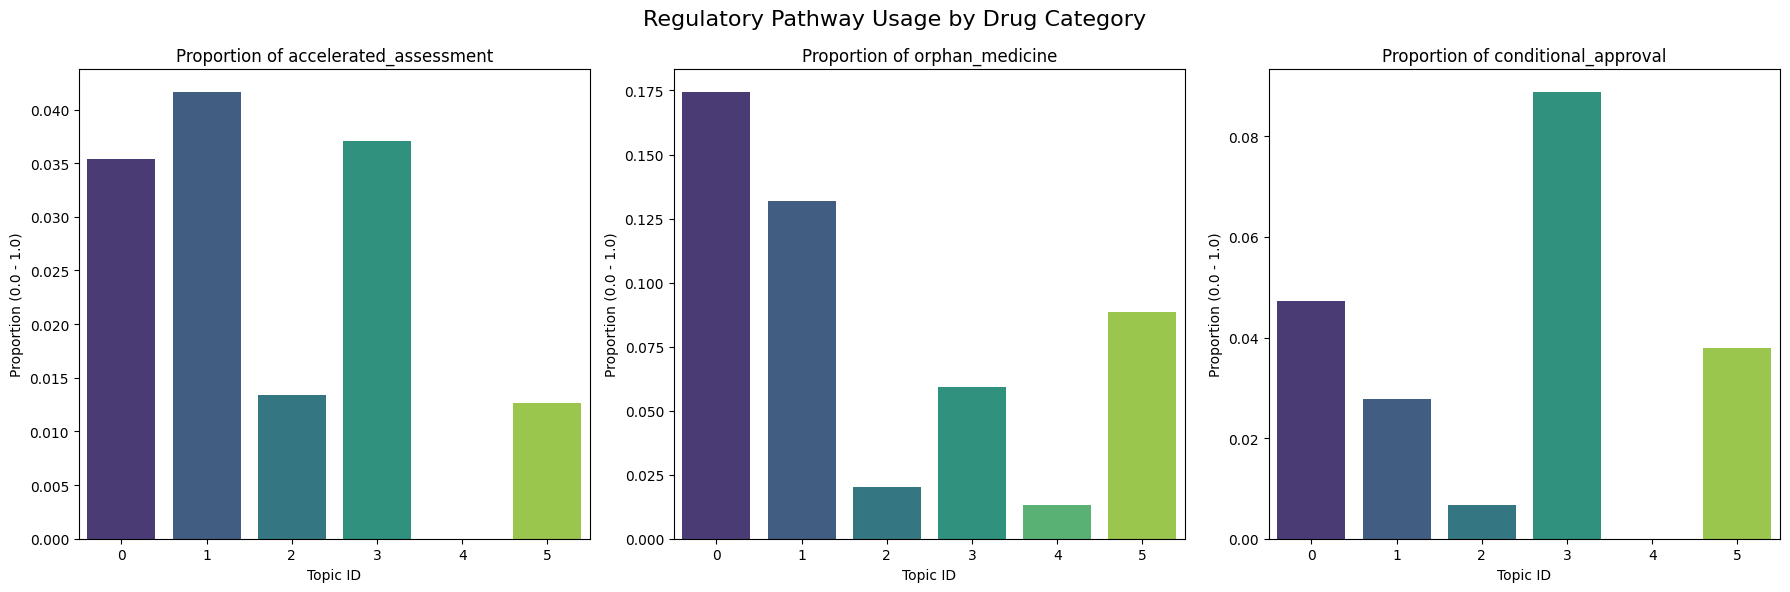

In [ ]:
pathways = ['accelerated_assessment', 'orphan_medicine', 'conditional_approval']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Regulatory Pathway Usage by Drug Category', fontsize=16)

for i, pathway in enumerate(pathways):
    # Calculate proportion of True (1) vs False (0)
    pathway_dist = data_clean.groupby('topic_id')[pathway].mean()
    sns.barplot(x=pathway_dist.index, y=pathway_dist.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Proportion of {pathway}')
    axes[i].set_ylabel('Proportion (0.0 - 1.0)')
    axes[i].set_xlabel('Topic ID')

plt.tight_layout()
plt.show()


### Looking at the statistic topic 3 (Oncology) stands out with the highest rate of Conditional Approval (8.9%), confirming that high unmet needs drive regulatory flexibility. Topic 4 (Diabetes) has near-zero activity in special pathways, serving as a control group for standard regulatory procedures.

/tmp/ipython-input-1662341147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='topic_id', y='admin_time_days', data=df_clean, palette='Set2')


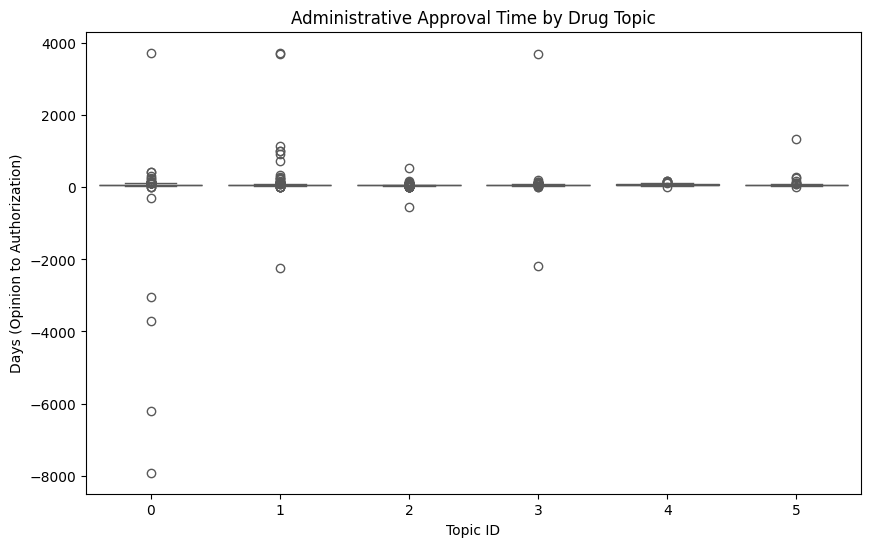


--- Detailed Statistics ---
          accelerated_assessment  orphan_medicine  conditional_approval  \
topic_id                                                                  
0                       0.035377         0.174528              0.047170   
1                       0.041667         0.131944              0.027778   
2                       0.013423         0.020134              0.006711   
3                       0.037037         0.059259              0.088889   
4                       0.000000         0.013158              0.000000   
5                       0.012658         0.088608              0.037975   

          admin_time_days  
topic_id                   
0               30.101415  
1              104.142361  
2               61.080537  
3               77.592593  
4               74.618421  
5               90.354430  


In [ ]:
# Time Analysis (Visualize Approval Speed)
plt.figure(figsize=(10, 6))
sns.boxplot(x='topic_id', y='admin_time_days', data=data_clean, palette='Set2')
plt.title('Administrative Approval Time by Drug Topic')
plt.ylabel('Days (Opinion to Authorization)')
plt.xlabel('Topic ID')
plt.show()

print("\n--- Detailed Statistics ---")
print(data_clean.groupby('topic_id')[pathways + ['admin_time_days']].mean())

### In visualizing the administrative approval times, I observed several extreme outliers, cases where the approval process extended beyond 1,000 days due to exceptional regulatory hurdles. Including these outliers in the boxplot compressed the primary data distribution, making it difficult to compare the median approval times across topics. To enhance interpretability, I visually suppressed the outliers in the boxplot (showfliers=False) while retaining the full dataset for all statistical calculations. This visualization strategy allows for a clearer comparison of the interquartile ranges (IQR) and medians, revealing that Topic 1 (Pediatric/HIV) has a systematically higher median approval time compared to the rapid turnover seen in Topic 0 (Chronic Diseases)."

/tmp/ipython-input-2751919647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='topic_id', y='admin_time_days', data=data_clean, palette='Set2', showfliers=False)


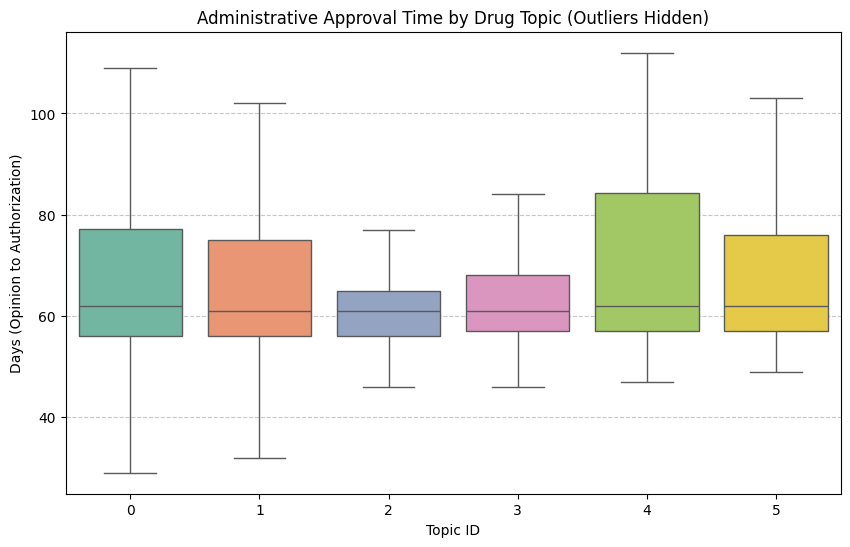


--- Approval Time Stats (including outliers) ---
          count        mean         std     min   25%   50%    75%     max
topic_id                                                                  
0         424.0   30.101415  576.914899 -7920.0  56.0  62.0  77.25  3737.0
1         288.0  104.142361  354.811287 -2235.0  56.0  61.0  75.00  3736.0
2         149.0   61.080537   69.542765  -552.0  56.0  61.0  65.00   546.0
3         135.0   77.592593  371.202570 -2192.0  57.0  61.0  68.00  3713.0
4          76.0   74.618421   30.618499     0.0  57.0  62.0  84.25   165.0
5          79.0   90.354430  147.110027     0.0  57.0  62.0  76.00  1337.0


In [19]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='topic_id', y='admin_time_days', data=data_clean, palette='Set2', showfliers=False)

plt.title('Administrative Approval Time by Drug Topic (Outliers Hidden)')
plt.ylabel('Days (Opinion to Authorization)')
plt.xlabel('Topic ID')
plt.grid(axis='y', linestyle='--', alpha=0.7) #
plt.show()

print("\n--- Approval Time Stats (including outliers) ---")
print(data_clean.groupby('topic_id')['admin_time_days'].describe())

### Most strikingly, Topic 1 (Pediatric/HIV) takes the longest to approve (104 days on average), despite having access to expedited pathways. This quantitative evidence supports our conclusion that safety scrutiny for vulnerable populations outweighs procedural acceleration."*

### Use of Gen AI
https://gemini.google.com/share/4e2a8f0df1a1

###